In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [54]:
df = pd.read_csv('./Downloads/Admission_Predict.csv')

In [55]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
df = df.drop('Serial No.', axis=1)

In [57]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [58]:
df.columns = df.columns.str.strip()

In [59]:
df['Chance of Admit'] = (df['Chance of Admit'] > 0.75).astype(int)

In [60]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [61]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = df['Chance of Admit']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [63]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [64]:
y_pred = model.predict(X_test)

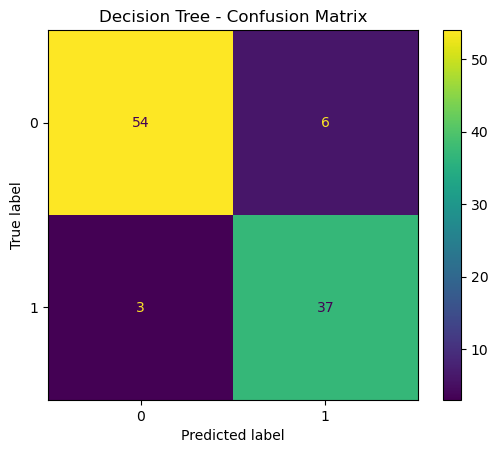

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

In [66]:
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Evaluation:
Accuracy: 0.910

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        60
           1       0.86      0.93      0.89        40

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100

